# Create Images of Sprites

Load in the sprite data

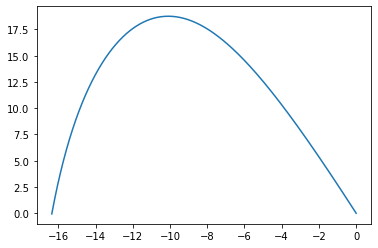

In [1]:
import numpy as np
import matplotlib.pyplot as plt

g = 9.81  # Acceleration due to gravity (m/s^2)
v0 = 400   # Initial velocity (m/s)
launch_angle = 110  
initial_height = 0
k = 2.225 # Air resistance constant (tune this value as needed, depending on the projectile and environment)
mass = 40    # mass of projecile

def calculating_Acclel(t, state, k, m):
    x, y, vx, vy = state
    v = np.sqrt(vx**2 + vy**2)
    F_air_x = -k * v * vx
    F_air_y = -k * v * vy
    ax = F_air_x / m
    ay = (F_air_y - m * g) / m
    return [vx, vy, ax, ay]

def runge_kutta_step(t, state, dt, k, m):
    k1 = calculating_Acclel(t, state, k, m)
    k2 = calculating_Acclel(t + 0.5*dt, [s + 0.5*dt*k for s, k in zip(state, k1)], k, m)
    k3 = calculating_Acclel(t + 0.5*dt, [s + 0.5*dt*k for s, k in zip(state, k2)], k, m)
    k4 = calculating_Acclel(t + dt, [s + dt*k for s, k in zip(state, k3)], k, m)
    return [s + dt/6 * (k1_i + 2*k2_i + 2*k3_i + k4_i) for s, k1_i, k2_i, k3_i, k4_i in zip(state, k1, k2, k3, k4)]

def projectile_motion_with_air_resistance(v0, theta, h0, k, m):
    if k==0 and theta==90:
        vx0=0
        vy0=v0
    else:
        theta = np.radians(theta)
        vx0 = v0 * np.cos(theta)
        vy0 = v0 * np.sin(theta)
    state = [0, h0, vx0, vy0]
    dt = 0.01
    times = [0]
    x_values = [0]
    y_values = [h0]
    
    while state[1] >= 0:
        t = times[-1]
        state = runge_kutta_step(t, state, dt, k, m)
        times.append(t + dt)
        x_values.append(state[0])
        y_values.append(state[1])
    
    time_of_flight = times[-1]
    
    return time_of_flight, times, x_values, y_values


g = 9.81  # Acceleration due to gravity (m/s^2)
v0 = 40   # Initial velocity (m/s)
launch_angle = 110  
initial_height = 0
k = 2.225 # Air resistance constant (tune this value as needed, depending on the projectile and environment)
mass = 40    # mass of projecile
time_of_flight, times, x_values, y_values = \
projectile_motion_with_air_resistance(v0, launch_angle,initial_height, k, mass)

fig, ax = plt.subplots()
ax.plot(x_values, y_values)

In [2]:
from PIL import Image, ImageColor
import os
img_dir = './sprites/'
imgs = []
for img_file in os.listdir(img_dir):
    if "BLANK" in img_file:
        continue
    img =  Image.open(img_dir + img_file) \
             .resize((48, 48), Image.LANCZOS)
    imgs += [img]

In [3]:
import random

g = 3.81  # Acceleration due to gravity (m/s^2)
v0 = 40   # Initial velocity (m/s)
initial_height = 0
k = 12.225 # Air resistance constant (tune this value as needed, depending on the projectile and environment)

paths = []
for i in range(0,30):
    launch_angle = random.randint(65, 115)
    mass = random.randint(40, 130)
    v0 = random.randint(40, 50)
    _, times, xs, ys = projectile_motion_with_air_resistance(v0, launch_angle,initial_height, k, mass)
    paths += [(xs[:37],ys[:37])]


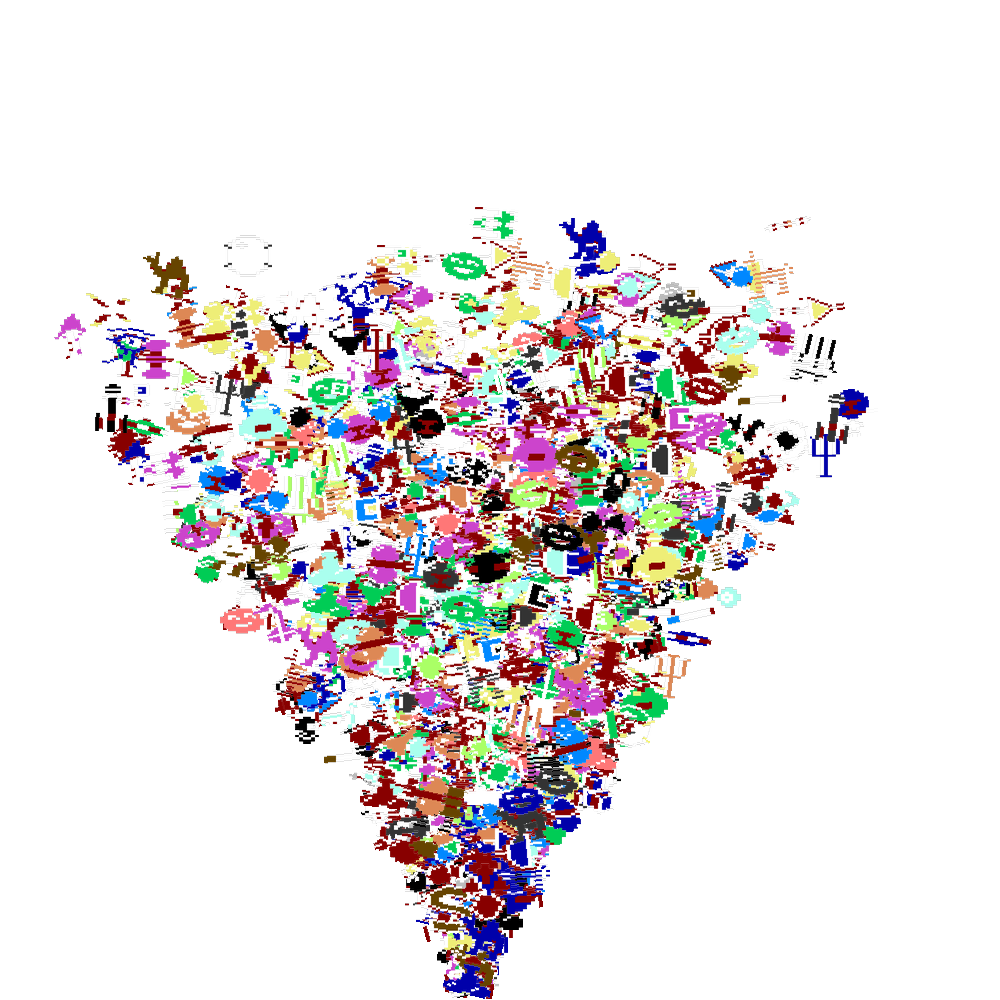

In [25]:
width = 1000
height = 1000
img = Image.new( 'RGBA', (width,height))
origin = (int(height/2),0)
i = 0
for xs,ys in paths:
    for x,y in zip(xs,ys):
        imr = imgs[i] \
                .rotate(180, Image.NEAREST, expand = 1) \
                .rotate(random.randint(-15,15), Image.NEAREST, expand = 1)
        r =  random.randint(-20*int(y),20*int(y))
        x = int(x*80) + r
        y = int(y*80)
        img.paste(imr, (origin[0]+x,origin[1]+y),imr)
        i += 1
        i = i % len(imgs)
img.rotate(180, Image.NEAREST, expand = 1)
